In [ ]:
!nvidia-smi

Mon Sep 21 23:04:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 55kB/s 


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
img_size = [224, 224]

train_path = '/content/drive/My Drive/IC dataset/train'
valid_path = '/content/drive/My Drive/IC dataset/test'

In [ ]:
train_path

'/content/drive/My Drive/IC dataset/train'

In [ ]:
rn152 = ResNet152V2(input_shape=img_size + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 4s 0us/step


In [ ]:
for layer in rn152.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/IC dataset/train/*')
folders

['/content/drive/My Drive/IC dataset/train/NORMAL',
 '/content/drive/My Drive/IC dataset/train/PNEUMONIA']

In [ ]:
len(folders)

2

In [ ]:
x = Flatten()(rn152.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=rn152.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/IC dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5226 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/IC dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
hist = model.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/50
164/164 [==============================] - 2821s 17s/step - loss: 1.9366 - accuracy: 0.9112 - val_loss: 5.3116 - val_accuracy: 0.7788
Epoch 2/50
164/164 [==============================] - 124s 757ms/step - loss: 0.6947 - accuracy: 0.9516 - val_loss: 2.2581 - val_accuracy: 0.8734
Epoch 3/50
164/164 [==============================] - 123s 752ms/step - loss: 0.8617 - accuracy: 0.9497 - val_loss: 2.4410 - val_accuracy: 0.9151
Epoch 4/50
164/164 [==============================] - 124s 755ms/step - loss: 0.6768 - accuracy: 0.9627 - val_loss: 2.8019 - val_accuracy: 0.8990
Epoch 5/50
164/164 [==============================] - 123s 748ms/step - loss: 0.6008 - accuracy: 0.9669 - val_loss: 3.6828 - val_accuracy: 0.8798
Epoch 6/50
164/164 [==============================] - 123s 752ms/step - loss: 0.5883 - accuracy: 0.9657 - val_loss: 3.7831 - val_accuracy: 0.8878
Epoch 7/50
164/164 [==============================] - 123s 748ms/step - loss: 0.4658 - accuracy: 0.9707 - val_loss: 3.6631 - 

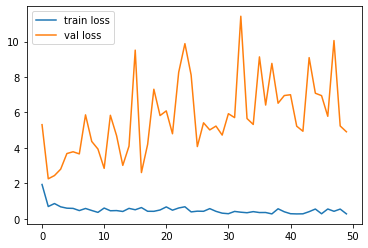

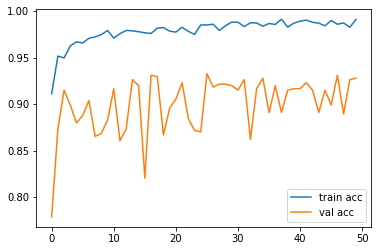

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()

plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('Pneu-detection_model_resnet152.h5') 

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.6729462e-32, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [4.1603294e-15, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [ ]:
img=image.load_img('/content/drive/My Drive/IC dataset/test/PNEUMONIA/person109_bacteria_522.jpeg',target_size=(224,224))

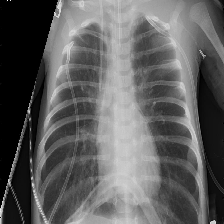

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 19.,  19.,  19.],
        [ 12.,  12.,  12.],
        [ 11.,  11.,  11.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 20.,  20.,  20.],
        [ 13.,  13.,  13.],
        [ 10.,  10.,  10.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 20.,  20.,  20.],
        [ 13.,  13.,  13.],
        [ 11.,  11.,  11.]],

       ...,

       [[198., 198., 198.],
        [139., 139., 139.],
        [ 68.,  68.,  68.],
        ...,
        [ 16.,  16.,  16.],
        [ 24.,  24.,  24.],
        [ 20.,  20.,  20.]],

       [[193., 193., 193.],
        [135., 135., 135.],
        [ 64.,  64.,  64.],
        ...,
        [ 22.,  22.,  22.],
        [ 20.,  20.,  20.],
        [ 36.,  36.,  36.]],

       [[196., 196., 196.],
        [135., 135., 135.],
        [ 65.,  

In [ ]:
x=x/255

In [ ]:
x

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.07450981, 0.07450981, 0.07450981],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04313726, 0.04313726, 0.04313726]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.07843138, 0.07843138, 0.07843138],
        [0.05098039, 0.05098039, 0.05098039],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.07843138, 0.07843138, 0.07843138],
        [0.05098039, 0.05098039, 0.05098039],
        [0.04313726, 0.04313726, 0.04313726]],

       ...,

       [[0.7764706 , 0.7764706 , 0.7764706 ],
        [0.54509807, 0.54509807, 0.54509807],
        [0.26666668, 0

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
img_data_test=np.argmax(model.predict(img_data), axis=1) 

In [ ]:
img_data_test

array([1])

In [ ]:
img_data_test==1

array([ True])